In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

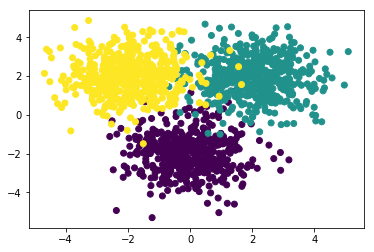

In [7]:
NClass=500
D=2
M=4
K=3
X1=np.random.randn(NClass,2)+np.array([0,-2])
X2=np.random.randn(NClass,2)+np.array([2,2])
X3=np.random.randn(NClass,2)+np.array([-2,2])
X=np.concatenate((X1,X2,X3))
y=np.array([0]*NClass+[1]*NClass+[2]*NClass)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [14]:
def one_hot_encoder(X):
    N=len(X)
    K=len(np.unique(X))
    Z=np.zeros((N,K))
    for i in range(N):
        c=X[i]
        Z[i,c]=1
    return Z
Y=one_hot_encoder(y)  

In [28]:
def init_weight(shape):
    return tf.Variable(tf.random_normal(shape,stddev=0.01))
def feed_forward(X,W1,b1,W2,b2):
    z=tf.nn.sigmoid(tf.matmul(X,W1)+b1)
    return tf.matmul(z,W2)+b2
tfX=tf.placeholder(tf.float32,[None,D])
tfY=tf.placeholder(tf.float32,[None,K])
W1=init_weight([D,M])
b1=init_weight([M])
W2=init_weight([M,K])
b2=init_weight([K])
y_p=feed_forward(tfX,W1,b1,W2,b2)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_p,labels=tfY))
train_nn=tf.train.GradientDescentOptimizer(0.01).minimize(cost)


In [29]:
predict_op=tf.argmax(y_p,1)

In [30]:
sess=tf.Session()

In [31]:
init=tf.global_variables_initializer()

In [32]:
sess.run(init)

In [33]:
for i in range(10000):
    sess.run(train_nn,feed_dict={tfX:X,tfY:Y})
    pred=sess.run(predict_op,feed_dict={tfX:X,tfY:Y})
    if i % 100==0:
        print(np.mean(y==pred))

0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.356
0.43666666666666665
0.5293333333333333
0.5806666666666667
0.6206666666666667
0.6366666666666667
0.6446666666666667
0.6473333333333333
0.6633333333333333
0.696
0.7173333333333334
0.7493333333333333
0.7793333333333333
0.8166666666666667
0.8493333333333334
0.882
0.9166666666666666
0.934
0.9486666666666667
0.958
0.9593333333333334
0.9586666666666667
0.962
0.9613333333333334
0.9606666666666667
0.9613333333333334
0.962
0.962
0.962
0.962
0.962
0.962
0.962
0.962
0.962
0.962
0.962
0.9613333333333334
0.9613333333333334
0.9613333333333334
0.9613333333333334
0.9613333333333334
0.9613333333333334
0.9613333333333334
0.9613333333333334
0.9613333333333334
0.962
0.962
0.962
0.962
0.962
0.962
0.962
0.962
0.962
0.962
0.962
0.962
0.962
0.962
0.962
0.962
0.9626666666666667
0.9626666666666667
0.9626666666666667
0.9626666666666667
0.9626666666666667
0.9626666666666667
0.9626666666666667
0.9